### *Reinforcement Learning Programming CSCN8020*
### *Assignment 1*
### *Submitted By : Aiswarya Thekkuveettil Thazhath - 8993970*

## Problem 1

We want to train a robot arm to pick up an object and place it somewhere else.

The robot should do this:

- Quickly
- Smoothly
- Without shaking or jerky movements
- Without crashing into things

 To use reinforcement learning, we model this task as a Markov Decision Process (MDP).An MDP is defined by the environment, agent, states, actions, transitions, rewards, and discount factor.

### 1. Agent

What it is: The robot's control system (the "brain" that makes decisions)

Reasoning: The agent needs to learn which motor commands to send to move the robot arm quickly and smoothly from picking up objects to placing them

### 2. Environment
What it is: Everything the robot interacts with:

- The robot arm itself (joints, motors, gripper)
- The workspace (table, objects to pick, target location)
- Physical laws (gravity, friction)

Reasoning: The environment responds to the robot's actions and provides feedback about what happened.



### 3. states

What it is: All the information the robot needs to make decisions:

- Joint angles (how bent each arm joint is)
- Joint velocities (how fast each joint is moving)
- Gripper position (where the hand is in space: x, y, z coordinates)
- Gripper velocity (how fast the hand is moving)
- Object location (where the object to pick up is)
- Target location (where to place the object)
- Gripper status (open or closed)

Reasoning:

- We need positions to know WHERE the robot is
- We need velocities to make movements SMOOTH (not jerky)
- This information tells us everything about the current situation without needing to remember the past

### 4. Actions (What the robot can do)

What it is: Commands sent to the motors:

- Motor torques (how much force to apply to each joint)
- Joint angle changes (how much to bend/straighten each joint)
- Gripper commands (open or close the hand)

Reasoning:

- We control motors DIRECTLY for precise, smooth movements
- Low-level control allows learning fine details of motion
- This gives the robot flexibility to discover the best way to move

### 5 . Rewards (What the robot gets points for)

| Situation | Reward | Reasoning |
|-----------|--------|-----------|
| Successfully places object | +100 | Main goal - big reward for success |
| Each time step | -0.1 | Encourages speed - don't waste time |
| Jerky/sudden movements | -1 to -5 | Encourages smoothness - penalize rough motion |
| Drops object | -20 | Avoid failure - learn to grip properly |
| Collision with obstacles | -50 | Safety first - don't crash |

**Reward Structure Principle:**
```
Success (+100) >> Safety (-20, -50) >> Smoothness (-1 to -5) >> Speed (-0.1)
```
Reasoning:
- Large positive reward for successful placement motivates task completion
- Small time penalty encourages efficient movements without rushing
- Smoothness penalties promote gentle, controlled motion
- Failure penalties teach safe and reliable behavior
- This combination achieves the goal of **fast AND smooth** movements

### 5. State Transitions (What happens next)
What it is: How the state changes when the robot takes an action

Physics equations determine new positions and velocities
Includes some randomness (motor noise, friction variations)

Reasoning:

Real robots have unpredictable elements (slipping, sensor noise)
The transition model captures how actions lead to new states
Randomness makes the learned policy more robust to real-world conditions

### 7. Discount Factor (γ)
What it is: γ = 0.95 to 0.99 (value between 0 and 1)
Reasoning:

High value (close to 1) because the big reward comes at the END of the task
Makes the robot plan for long-term success, not just immediate rewards
Balances quick movements with smooth, careful control

## Problem 2

We have a 2*2 grid with the configuration below ;

### s1 (R = 5) | s2 (R = 10)
`---------------------------`
### s3 (R = 1) | s4 (R = 2)

given informations 

- states : s1, s2, s3, s4
- Actions :  up, down, left, right
- Initial Policy (π): For all states, π(up|s) = 1 (always go up)
  Transition Probabilities P(s'|s, a): If the action is valid (does not run into a wall), the transition is deterministic. Otherwise, s' = s.
- Rewards R(s):

    - R(s1) = 5 for all actions a
    - R(s2) = 10 for all actions a
    - R(s3) = 1 for all actions a
    - R(s4) = 2 for all actions a


- Discount Factor (γ): We assume γ = 1 (since not specified in the problem statement)

- Transition Dynamics

Understanding how the agent moves in the gridworld:
- From s1:

    - up → s1 (hits wall, stays in place)
    - down → s3 (moves to s3)
    - left → s1 (hits wall, stays in place)
    - right → s2 (moves to s2)

- From s2:

    - up → s2 (hits wall, stays in place)
    - down → s4 (moves to s4)
    - left → s1 (moves to s1)
    - right → s2 (hits wall, stays in place)

- From s3:

    - up → s1 (moves to s1)
    - down → s3 (hits wall, stays in place)
    - left → s3 (hits wall, stays in place)
    - right → s4 (moves to s4)

- From s4:

    - up → s2 (moves to s2)
    - down → s4 (hits wall, stays in place)
    - left → s3 (moves to s3)
    - right → s4 (hits wall, stays in place)

- `Iteration 1`

`*Step 1: Initial Value Function*`

We start by initializing all state values to zero, as we have no prior knowledge about the value of being in any state:

V₀(s1) = 0,

V₀(s2) = 0,

V₀(s3) = 0,

V₀(s4) = 0

`*Step 2: Value Update Formula*`

The value iteration update formula is:

V(s) = R(s) + γ × max_a[V(s')]

where:

R(s) is the immediate reward for being in state s
γ is the discount factor (γ = 1 in this case)
s' is the next state after taking action a
max_a means we choose the action that gives us the maximum value

`*Step 3: Compute Updated Value for Each State*`

For state s1 (R = 5):
We evaluate all four possible actions and calculate the value for each:

- up → s1: V = 5 + 1 × V₀(s1) = 5 + 1 × 0 = 5

- down → s3: V = 5 + 1 × V₀(s3) = 5 + 1 × 0 = 5

- left → s1: V = 5 + 1 × V₀(s1) = 5 + 1 × 0 = 5

- right → s2: V = 5 + 1 × V₀(s2) = 5 + 1 × 0 = 5

Best action value = max(5, 5, 5, 5) = 5

Therefore: V₁(s1) = 5

For state s2 (R = 10):

- up → s2: V = 10 + 1 × V₀(s2) = 10 + 1 × 0 = 10

- down → s4: V = 10 + 1 × V₀(s4) = 10 + 1 × 0 = 10

- left → s1: V = 10 + 1 × V₀(s1) = 10 + 1 × 0 = 10

- right → s2: V = 10 + 1 × V₀(s2) = 10 + 1 × 0 = 10

Best action value = max(10, 10, 10, 10) = 10
Therefore: V₁(s2) = 10

For state s3 (R = 1):

- up → s1: V = 1 + 1 × V₀(s1) = 1 + 1 × 0 = 1

- down → s3: V = 1 + 1 × V₀(s3) = 1 + 1 × 0 = 1

- left → s3: V = 1 + 1 × V₀(s3) = 1 + 1 × 0 = 1

- right → s4: V = 1 + 1 × V₀(s4) = 1 + 1 × 0 = 1

Best action value = max(1, 1, 1, 1) = 1
Therefore: V₁(s3) = 1

For state s4 (R = 2):

- up → s2: V = 2 + 1 × V₀(s2) = 2 + 1 × 0 = 2
- down → s4: V = 2 + 1 × V₀(s4) = 2 + 1 × 0 = 2
- left → s3: V = 2 + 1 × V₀(s3) = 2 + 1 × 0 = 2
- right → s4: V = 2 + 1 × V₀(s4) = 2 + 1 × 0 = 2

Best action value = max(2, 2, 2, 2) = 2
Therefore: V₁(s4) = 2

`*Step 4: Updated Value Function After Iteration 1*`

- V₁(s1) = 5
- V₁(s2) = 10
- V₁(s3) = 1
- V₁(s4) = 2

 In the first iteration, since all next-state values were initialized to zero, each state's value equals its immediate reward. This represents the value of being in that state with no consideration of future rewards.

 `Iteration 2`
 
Now we perform the second iteration using the updated values from V₁.

`*Step 1: Compute Updated Value for Each State Using V₁*`
For state s1 (R = 5):
Now we use the values from iteration 1 when looking ahead:

- up → s1: V = 5 + 1 × V₁(s1) = 5 + 1 × 5 = 10
- down → s3: V = 5 + 1 × V₁(s3) = 5 + 1 × 1 = 6
- left → s1: V = 5 + 1 × V₁(s1) = 5 + 1 × 5 = 10
- right → s2: V = 5 + 1 × V₁(s2) = 5 + 1 × 10 = 15 

Best action value = max(10, 6, 10, 15) = 15
Therefore: V₂(s1) = 15
For state s2 (R = 10):

- up → s2: V = 10 + 1 × V₁(s2) = 10 + 1 × 10 = 20 
- down → s4: V = 10 + 1 × V₁(s4) = 10 + 1 × 2 = 12
- left → s1: V = 10 + 1 × V₁(s1) = 10 + 1 × 5 = 15
- right → s2: V = 10 + 1 × V₁(s2) = 10 + 1 × 10 = 20 

Best action value = max(20, 12, 15, 20) = 20
Therefore: V₂(s2) = 20
For state s3 (R = 1):

- up → s1: V = 1 + 1 × V₁(s1) = 1 + 1 × 5 = 6 
- down → s3: V = 1 + 1 × V₁(s3) = 1 + 1 × 1 = 2
- left → s3: V = 1 + 1 × V₁(s3) = 1 + 1 × 1 = 2
- right → s4: V = 1 + 1 × V₁(s4) = 1 + 1 × 2 = 3

Best action value = max(6, 2, 2, 3) = 6
Therefore: V₂(s3) = 6
For state s4 (R = 2):

- up → s2: V = 2 + 1 × V₁(s2) = 2 + 1 × 10 = 12 
- down → s4: V = 2 + 1 × V₁(s4) = 2 + 1 × 2 = 4
- left → s3: V = 2 + 1 × V₁(s3) = 2 + 1 × 1 = 3
- right → s4: V = 2 + 1 × V₁(s4) = 2 + 1 × 2 = 4

Best action value = max(12, 4, 3, 4) = 12
Therefore: V₂(s4) = 12

`*Step 2: Updated Value Function After Iteration 2*`

After completing the second iteration, the value function is:

- V₂(s1) = 15
- V₂(s2) = 20
- V₂(s3) = 6
- V₂(s4) = 12

### Problem 3 

### Task1: Update MDP Code

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Configuration
gamma = 0.9
threshold = 1e-4
rows = 5
cols = 5
goal = (4, 4)
grey = [(2, 2), (3, 0), (0, 4)]
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # right, down, left, up

In [18]:
def get_next_state(i, j, a):
    di, dj = actions[a]
    ni, nj = i + di, j + dj
    if 0 <= ni < rows and 0 <= nj < cols:
        return ni, nj
    return i, j

def get_reward(ni, nj):
    if (ni, nj) == goal:
        return 10
    if (ni, nj) in grey:
        return -5
    return -1

In [24]:
print("TASK 1: Standard Value Iteration\n")

V_standard = np.zeros((rows, cols))
iteration_standard = 0
start_time = time.time()

while True:
    delta = 0
    new_V = V_standard.copy()
    
    for i in range(rows):
        for j in range(cols):
            if (i, j) == goal:
                continue
            
            max_v = float('-inf')
            for a in range(4):
                ni, nj = get_next_state(i, j, a)
                r = get_reward(ni, nj)
                v = r + gamma * V_standard[ni, nj]
                if v > max_v:
                    max_v = v
            
            new_V[i, j] = max_v
            delta = max(delta, abs(V_standard[i, j] - new_V[i, j]))
    
    V_standard = new_V
    iteration_standard += 1
    
    if delta < threshold:
        break

time_standard = time.time() - start_time

print(f"Iterations: {iteration_standard}")
print(f"Time: {time_standard:.4f} seconds")
policy_standard = np.zeros((rows, cols), dtype=int)
action_symbols = ['→', '↓', '←', '↑']

for i in range(rows):
    for j in range(cols):
        if (i, j) == goal:
            continue
        
        max_v = float('-inf')
        best_action = 0
        
        for a in range(4):
            ni, nj = get_next_state(i, j, a)
            r = get_reward(ni, nj)
            v = r + gamma * V_standard[ni, nj]
            if v > max_v:
                max_v = v
                best_action = a
        
        policy_standard[i, j] = best_action

# Display results
print("\nOptimal Value Function V*(s):")
print(np.round(V_standard, 4))

print("\nOptimal Policy π*(s):")
for i in range(rows):
    for j in range(cols):
        if (i, j) == goal:
            print("GOAL", end="  ")
        else:
            print(f" {action_symbols[policy_standard[i,j]]}  ", end="  ")
    print()

TASK 1: Standard Value Iteration

Iterations: 9
Time: 0.0008 seconds

Optimal Value Function V*(s):
[[-0.4341  0.6288  1.8098  3.122   4.58  ]
 [ 0.6288  1.8098  3.122   4.58    6.2   ]
 [ 1.8098  3.122   4.58    6.2     8.    ]
 [ 3.122   4.58    6.2     8.     10.    ]
 [ 4.58    6.2     8.     10.      0.    ]]

Optimal Policy π*(s):
 →     →     →     ↓     ↓    
 →     →     →     →     ↓    
 →     ↓     →     →     ↓    
 →     →     →     →     ↓    
 →     →     →     →    GOAL  


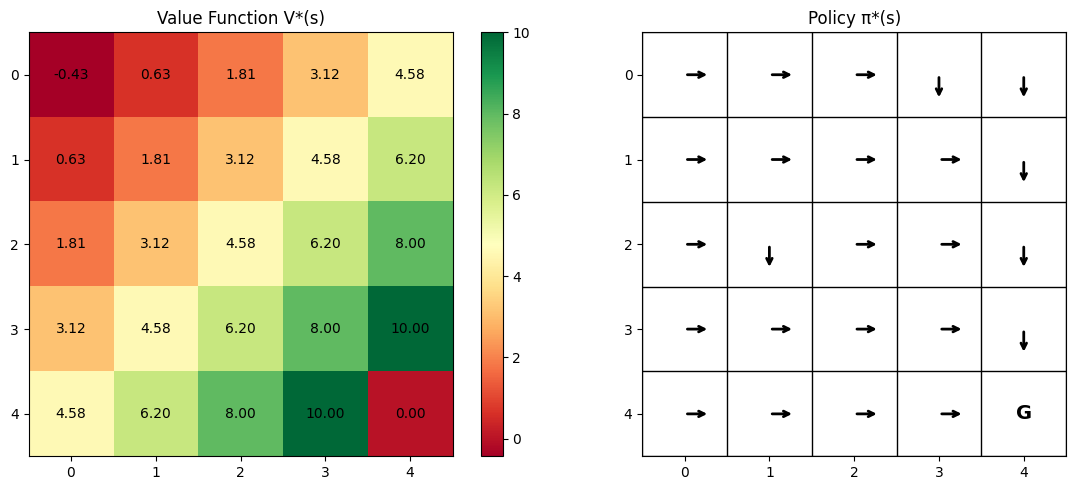

In [ ]:
"""
Visualization: Value Function Heatmap and Policy Arrows
"""

print("\n" + "=" * 70)
print("VISUALIZATION")
print("=" * 70)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# =========================================================================
# Plot 1: Value Function Heatmap
# =========================================================================
im = ax1.imshow(V_standard, cmap='RdYlGn', interpolation='nearest')
ax1.set_title('Optimal Value Function V*(s)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Column')
ax1.set_ylabel('Row')

# Add value text on each cell
for i in range(rows):
    for j in range(cols):
        text_color = 'white' if V_standard[i, j] < -3 else 'black'
        ax1.text(j, i, f'{V_standard[i,j]:.2f}', 
                ha="center", va="center", color=text_color, fontsize=10)

# Mark special states
ax1.scatter(goal[1], goal[0], s=300, c='gold', marker='*', 
           edgecolors='black', linewidths=2, label='Goal', zorder=5)
for g in grey:
    ax1.scatter(g[1], g[0], s=200, c='gray', marker='s', 
               edgecolors='black', linewidths=1, alpha=0.3, zorder=3)

plt.colorbar(im, ax=ax1, label='Value')
ax1.legend(loc='upper left')
ax1.set_xticks(range(cols))
ax1.set_yticks(range(rows))
ax1.grid(True, linewidth=0.5, alpha=0.3)

# =========================================================================
# Plot 2: Policy Arrows
# =========================================================================
ax2.set_xlim(-0.5, cols-0.5)
ax2.set_ylim(-0.5, rows-0.5)
ax2.set_aspect('equal')
ax2.invert_yaxis()
ax2.set_title('Optimal Policy π*(s)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Column')
ax2.set_ylabel('Row')

# Draw grid
for i in range(rows+1):
    ax2.axhline(i-0.5, color='black', linewidth=1)
for j in range(cols+1):
    ax2.axvline(j-0.5, color='black', linewidth=1)

# Draw arrows for policy
arrow_props = dict(arrowstyle='->', lw=2, color='blue')
action_deltas = [(0.3, 0), (0, 0.3), (-0.3, 0), (0, -0.3)]  # right, down, left, up

for i in range(rows):
    for j in range(cols):
        if (i, j) == goal:
            ax2.text(j, i, 'GOAL', ha='center', va='center', 
                    fontsize=12, fontweight='bold', color='green',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
        else:
            action = policy_standard[i, j]
            dx, dy = action_deltas[action]
            ax2.annotate('', xy=(j+dx, i+dy), xytext=(j, i), 
                        arrowprops=arrow_props)

# Highlight grey states
for g in grey:
    rect = plt.Rectangle((g[1]-0.5, g[0]-0.5), 1, 1, 
                         linewidth=2, edgecolor='red', 
                         facecolor='gray', alpha=0.3)
    ax2.add_patch(rect)

ax2.set_xticks(range(cols))
ax2.set_yticks(range(rows))
ax2.grid(False)

plt.tight_layout()
plt.show()

print("\n✓ Visualization complete")

### Task 2 Value Iteration Variations

In [22]:
print("\nTASK 2: In-Place Value Iteration\n")

V_inplace = np.zeros((rows, cols))
iteration_inplace = 0
start_time = time.time()

while True:
    delta = 0
    
    for i in range(rows):
        for j in range(cols):
            if (i, j) == goal:
                continue
            
            old_v = V_inplace[i, j]
            max_v = float('-inf')
            
            for a in range(4):
                ni, nj = get_next_state(i, j, a)
                r = get_reward(ni, nj)
                v = r + gamma * V_inplace[ni, nj]
                if v > max_v:
                    max_v = v
            
            V_inplace[i, j] = max_v
            delta = max(delta, abs(old_v - V_inplace[i, j]))
    
    iteration_inplace += 1
    
    if delta < threshold:
        break

time_inplace = time.time() - start_time

print(f"Iterations: {iteration_inplace}")
print(f"Time: {time_inplace:.4f} seconds")

print("\nOptimal Value Function V*(s):")
print(np.round(V_inplace, 4))


TASK 2: In-Place Value Iteration

Iterations: 9
Time: 0.0007 seconds

Optimal Value Function V*(s):
[[-0.4341  0.6288  1.8098  3.122   4.58  ]
 [ 0.6288  1.8098  3.122   4.58    6.2   ]
 [ 1.8098  3.122   4.58    6.2     8.    ]
 [ 3.122   4.58    6.2     8.     10.    ]
 [ 4.58    6.2     8.     10.      0.    ]]


### Comparison
- Both algorithms converged in exactly 9 iterations, mentioning the identical convergence behavior for this problem

- In case of execution time standard value iteration 0.0008 s and In place VI 0.0007 s, In place VI is bit faster

- Both found identical optimal values and policies

### Problem 4 Off-policy Monte Carlo with Importance Sampling

In [29]:
"""
Problem 4: Off-Policy Monte Carlo with Importance Sampling
"""

import numpy as np
import time

# Configuration (same as Problem 3)
gamma = 0.9
rows, cols = 5, 5
goal = (4, 4)
grey = [(2, 2), (3, 0), (0, 4)]
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Helper functions
def get_next_state(i, j, a):
    di, dj = actions[a]
    ni, nj = i + di, j + dj
    if 0 <= ni < rows and 0 <= nj < cols:
        return ni, nj
    return i, j

def get_reward(ni, nj):
    if (ni, nj) == goal:
        return 10
    if (ni, nj) in grey:
        return -5
    return -1

# Generate episode using random behavior policy
def generate_episode():
    i = np.random.randint(0, rows)
    j = np.random.randint(0, cols)
    episode = []
    max_steps = 100
    steps = 0
    done = False
    
    while not done and steps < max_steps:
        a = np.random.randint(0, 4)  # Random behavior policy
        ni, nj = get_next_state(i, j, a)
        r = get_reward(ni, nj)
        episode.append(((i, j), a, r))
        i, j = ni, nj
        steps += 1
        if (i, j) == goal:
            done = True
    
    return episode

# Off-Policy Monte Carlo with Importance Sampling
print("Off-Policy Monte Carlo with Importance Sampling\n")

Q = np.zeros((rows, cols, 4))
C = np.zeros((rows, cols, 4))
num_episodes = 50000

start_time_mc = time.time()

for ep in range(num_episodes):
    episode = generate_episode()
    G = 0.0
    W = 1.0
    
    for t in range(len(episode) - 1, -1, -1):
        s, a, r = episode[t]
        G = r + gamma * G
        C[s[0], s[1], a] += W
        Q[s[0], s[1], a] += (W / C[s[0], s[1], a]) * (G - Q[s[0], s[1], a])
        
        pi_s = np.argmax(Q[s[0], s[1]])
        if a != pi_s:
            break
        W = W / 0.25  # b(a|s) = 0.25
    
    if (ep + 1) % 10000 == 0:
        print(f"Progress: {ep + 1}/{num_episodes} episodes")

V_mc = np.max(Q, axis=2)
V_mc[4, 4] = 0  # Set terminal to 0

end_time_mc = time.time()

print('\nEstimated Value Function (MC):')
print(np.round(V_mc, 4))
print(f'\nEpisodes: {num_episodes}')
print(f'Time: {end_time_mc - start_time_mc:.4f} seconds')

# Extract policy
policy_mc = np.argmax(Q, axis=2)
action_symbols = ['→', '↓', '←', '↑']

print('\nLearned Policy:')
for i in range(rows):
    for j in range(cols):
        if (i, j) == goal:
            print("GOAL", end="  ")
        else:
            print(f" {action_symbols[policy_mc[i, j]]}  ", end="  ")
    print()

Off-Policy Monte Carlo with Importance Sampling

Progress: 10000/50000 episodes
Progress: 20000/50000 episodes
Progress: 30000/50000 episodes
Progress: 40000/50000 episodes
Progress: 50000/50000 episodes

Estimated Value Function (MC):
[[-0.4704  0.5879  1.6794  2.9522  4.4848]
 [ 0.5538  1.7441  3.0222  4.4589  6.1149]
 [ 1.6923  3.0145  4.4806  6.1188  7.9507]
 [ 3.02    4.4685  6.1148  7.9478 10.    ]
 [ 4.4757  6.1142  7.954  10.      0.    ]]

Episodes: 50000
Time: 4.8653 seconds

Learned Policy:
 →     ↓     →     ↓     ↓    
 →     →     →     →     ↓    
 →     ↓     →     ↓     ↓    
 ↓     →     →     →     ↓    
 →     →     →     →    GOAL  
